# CUSTOMER CHURN PREDICTION

## Customer Churn

Customer churn, also known as customer attrition, occurs when customers stop doing business with a company. The companies are interested in identifying segments of these customers because the price for acquiring a new customer is usually higher than retaining the old one. For example, if Netflix knew a segment of customers who were at risk of churning they could proactively engage them with special offers instead of simply losing them.


Can you develop a machine learning model that can predict the customers who will leave the company?

The aim is to estimate whether a bank's customers leave the bank or not.

The event that defines the customer abandonment is the closing of the customer's bank account.



# Import Libraries

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split,cross_val_score
import itertools
from sklearn.preprocessing import scale,StandardScaler, MinMaxScaler,Normalizer,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [25]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Data Preprocessing

Check for Null Values

In [26]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

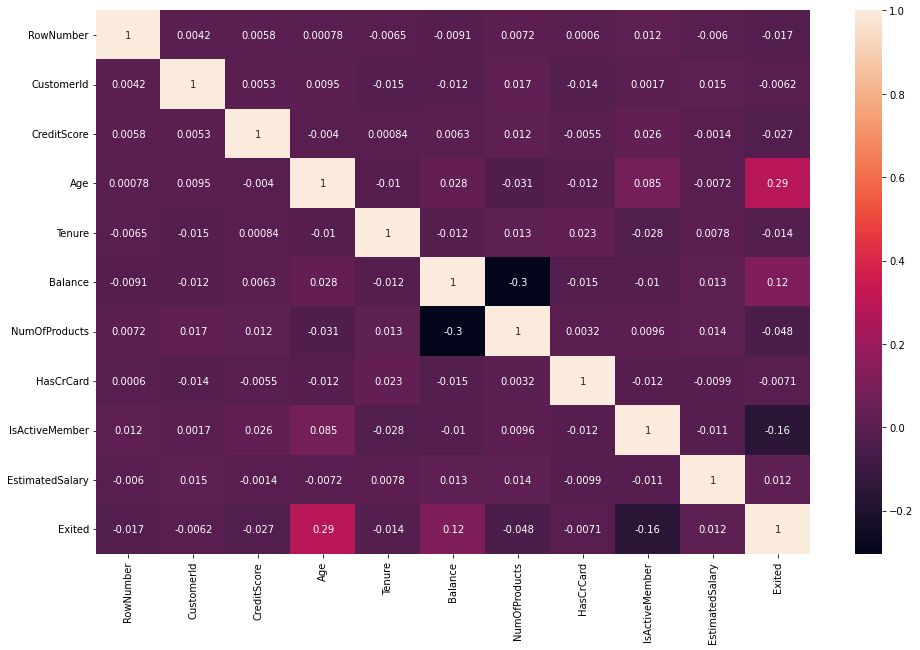

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

detect outliers

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

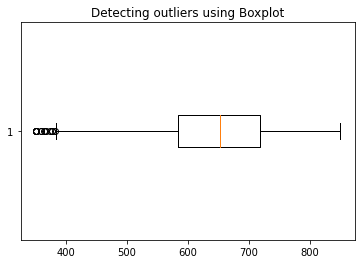

In [28]:
plt.boxplot(data['CreditScore'], vert=False)
plt.title("Detecting outliers using Boxplot")


In [29]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(data['CreditScore'])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [359, 350, 350, 358, 351, 350, 350, 350]


In [30]:
print(data['CreditScore'].quantile(0.50)) 
print(data['CreditScore'].quantile(0.95))

652.0
812.0


In [31]:
data['CreditScore'] = np.where(data['CreditScore'] > 812, 652, data['CreditScore'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


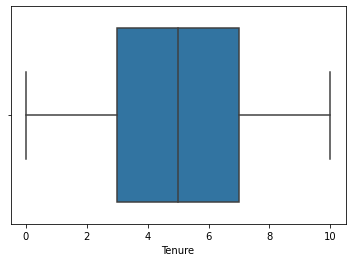

In [32]:
sns.boxplot(data['Tenure'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


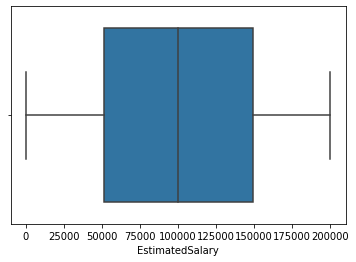

In [33]:
sns.boxplot(data['EstimatedSalary'])

In [34]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

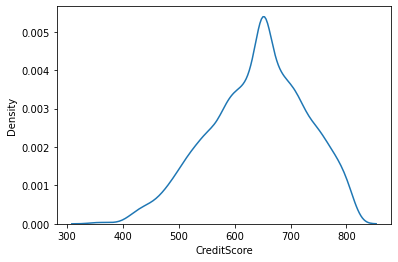

In [35]:
sns.kdeplot(data['CreditScore'])

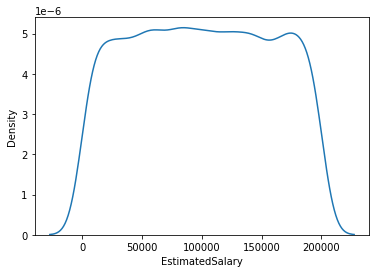

In [36]:
sns.kdeplot(data['EstimatedSalary'])

In [37]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis = 1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,652,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [38]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [39]:
data['Geography'] = data['Geography'].map({'France': 1, 'Germany':2, 'Spain':3})
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

In [40]:
data['Geography']

0       1
1       3
2       1
3       1
4       3
       ..
9995    1
9996    1
9997    1
9998    2
9999    1
Name: Geography, Length: 10000, dtype: int64

In [41]:
features = ['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

label = ['Exited']

X = data[features]
y = data[label]

# Split data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [43]:
X_test.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [44]:
X_train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [45]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,2,0,32,3,96709.07,2,0,0,41788.37
4684,623,1,0,43,1,0.00,2,1,1,146379.30
1731,601,3,1,44,4,0.00,2,1,0,58561.31
4742,506,2,0,59,8,119152.10,2,1,1,170679.74
4521,560,3,1,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...
4862,645,3,1,55,1,133676.65,1,0,1,17095.49
7025,569,3,1,51,3,0.00,3,1,0,75084.96
7647,768,1,0,25,0,78396.08,1,1,1,8316.19
7161,690,1,1,36,6,110480.48,1,0,0,81292.33


In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

In [48]:
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train, y_train)
#end = timer.time()
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test)
y_svm_prob = svm_model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2003
           1       0.83      0.38      0.52       497

    accuracy                           0.86      2500
   macro avg       0.85      0.68      0.72      2500
weighted avg       0.86      0.86      0.84      2500

Confusion matrix for SVM: 
[[1964   39]
 [ 310  187]]
Accuracy score for SVM: 0.86
Precision score for SVM: 0.83
Recall score for SVM: 0.38
F1 score for SVM: 0.52
Sensitivity score for SVM: 0.38
Specitivity score for SVM: 0.98
AUC score for SVM: 0.83


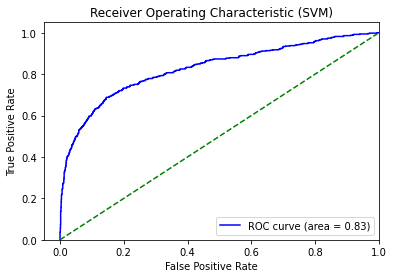

In [49]:
print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_svm)))
# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))
# calculate sensitivity, specificity, and auc
sens_svm,spec_svm = calc_sens_spec(y_test,y_svm)
fpr, tpr, _ = roc_curve(y_test,  y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specitivity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
plt.show()

In [50]:
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train, y_train)

#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test)
y_ranfor_prob = ranfor_model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.76      0.47      0.58       497

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500

Confusion matrix for RF: 
[[1931   72]
 [ 265  232]]
Accuracy score for RF: 0.87
Precision score for RF: 0.76
Recall score for RF: 0.47
F1 score for RF: 0.58
Sensitivity score for RF: 0.47
Specitivity score for RF: 0.96
AUC score for RF: 0.86


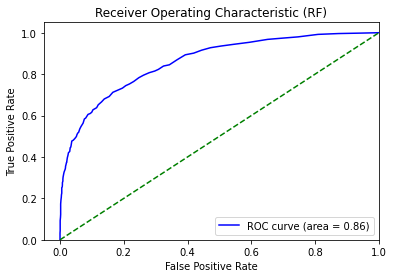

In [51]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))
# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)
fpr, tpr, _ = roc_curve(y_test,  y_ranfor_prob[:,1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

In [52]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test)
y_xgb_prob = xgb_model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.46      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500

Confusion matrix for XGB: 
[[1939   64]
 [ 269  228]]
Accuracy score for XGB: 0.87
Precision score for XGB: 0.78
Recall score for XGB: 0.46
F1 score for XGB: 0.58
Sensitivity score for XGB: 0.46
Specitivity score for XGB: 0.97
AUC score for XGB: 0.86


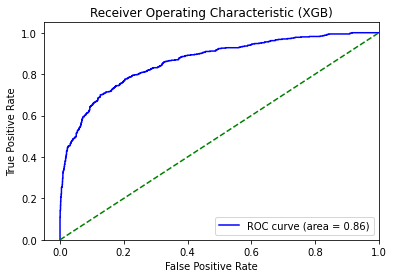

In [53]:
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_xgb)))
print("Accuracy score for XGB: {:.2f}".format(accuracy_score(y_test,y_xgb)))
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)
print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))
# calculate sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test,y_xgb)
fpr, tpr, _ = roc_curve(y_test,  y_xgb_prob[:,1])
auc_xgb = roc_auc_score(y_test, y_xgb_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGB)')
ax.legend(loc="lower right")
plt.show()

In [54]:
model = LGBMClassifier()
model.fit(X_train, y_train)
y_lgbm = model.predict(X_test)
y_lgbm_prob = model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2003
           1       0.75      0.51      0.61       497

    accuracy                           0.87      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500

Confusion matrix for XGB: 
[[1919   84]
 [ 245  252]]
Accuracy score for XGB: 0.87
Precision score for XGB: 0.75
Recall score for XGB: 0.51
F1 score for XGB: 0.61
Sensitivity score for XGB: 0.51
Specitivity score for XGB: 0.96
AUC score for XGB: 0.87


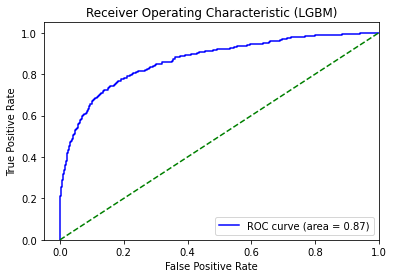

In [55]:
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_lgbm)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_lgbm)))
print("Accuracy score for XGB: {:.2f}".format(accuracy_score(y_test,y_lgbm)))
# calculate precision, recall, and f1 scores
prec_lgbm = precision_score(y_test,y_lgbm)
rec_lgbm = recall_score(y_test,y_lgbm)
f1_lgbm = f1_score(y_test,y_lgbm)
print("Precision score for XGB: {:.2f}".format(prec_lgbm))
print("Recall score for XGB: {:.2f}".format(rec_lgbm))
print("F1 score for XGB: {:.2f}".format(f1_lgbm))
# calculate sensitivity, specificity, and auc
sens_lgbm,spec_lgbm = calc_sens_spec(y_test,y_lgbm)
fpr, tpr, _ = roc_curve(y_test,  y_lgbm_prob[:,1])
auc_lgbm = roc_auc_score(y_test, y_lgbm_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_lgbm))
print("Specitivity score for XGB: {:.2f}".format(spec_lgbm))
print("AUC score for XGB: {:.2f}".format(auc_lgbm))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_lgbm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LGBM)')
ax.legend(loc="lower right")
plt.show()

In [56]:
import pickle
file = open('lgbm_model.pkl','wb')
pickle.dump(model, file)

In [57]:
X_test

array([[-0.54144083,  0.30121896, -0.91186722, ..., -1.53973586,
        -1.03115165, -1.02282685],
       [-0.22778433, -0.90494345, -0.91186722, ...,  0.64946204,
         0.96978946,  0.79406925],
       [-0.4833563 ,  1.50738137,  1.09665089, ...,  0.64946204,
        -1.03115165, -0.73145656],
       ...,
       [ 1.45666729, -0.90494345, -0.91186722, ...,  0.64946204,
         0.96978946, -1.60428715],
       [ 0.55054849, -0.90494345,  1.09665089, ..., -1.53973586,
        -1.03115165, -0.33658579],
       [-0.44850557,  0.30121896,  1.09665089, ...,  0.64946204,
         0.96978946, -0.73379302]])

In [58]:
my_data = [[750,2,1,40,4,15000,1,0,1,15000]]
my_data = sc.transform(my_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [60]:
prediction = model.predict(my_data)

In [61]:
prediction

array([0])